# Linear algebra for data science
# Chapter 10

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from latools import matrix, imatrix
import time

## Testing scipy.linalg.lu

In [2]:
A = imatrix(5)

<AxesSubplot:>

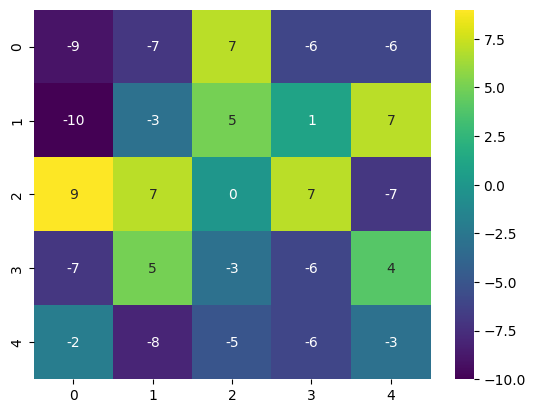

In [3]:
sns.heatmap(A, cmap='viridis', annot=True)

In [4]:
P,L,U = scipy.linalg.lu(A) # Remembering that P is transposed permutation matrix (PtA = LU)

<AxesSubplot:>

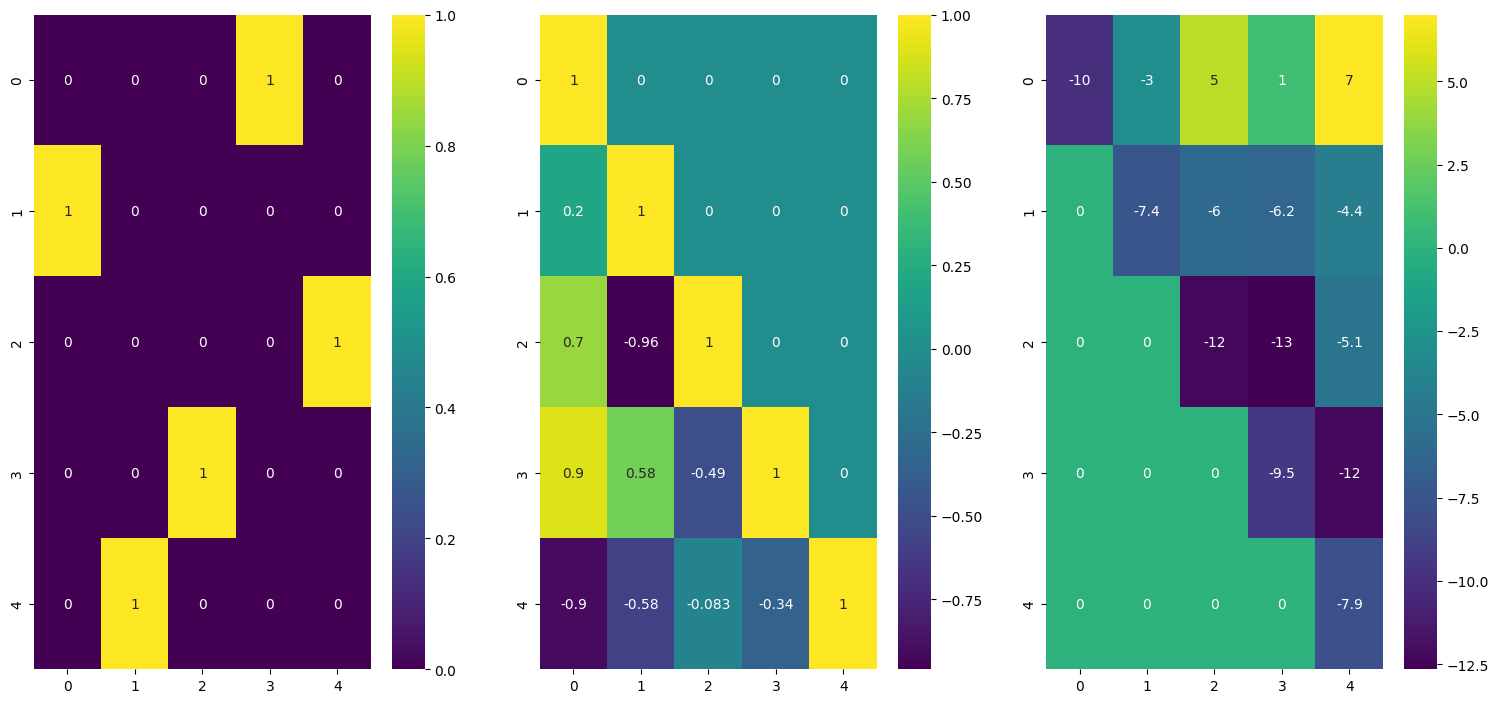

In [5]:
fig, ax =plt.subplots(1,3)

fig.set_size_inches(18.5, 8.5)

sns.heatmap(P, cmap='viridis', ax=ax[0], annot=True)
sns.heatmap(L, cmap='viridis', ax=ax[1], annot=True)
sns.heatmap(U, cmap='viridis', ax=ax[2], annot=True)

<AxesSubplot:>

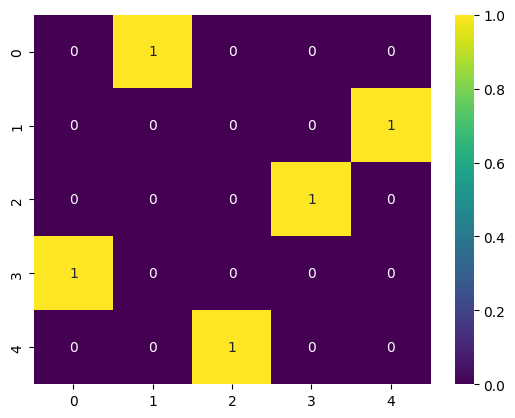

In [6]:
sns.heatmap(P.T, cmap='viridis', annot=True)

<AxesSubplot:>

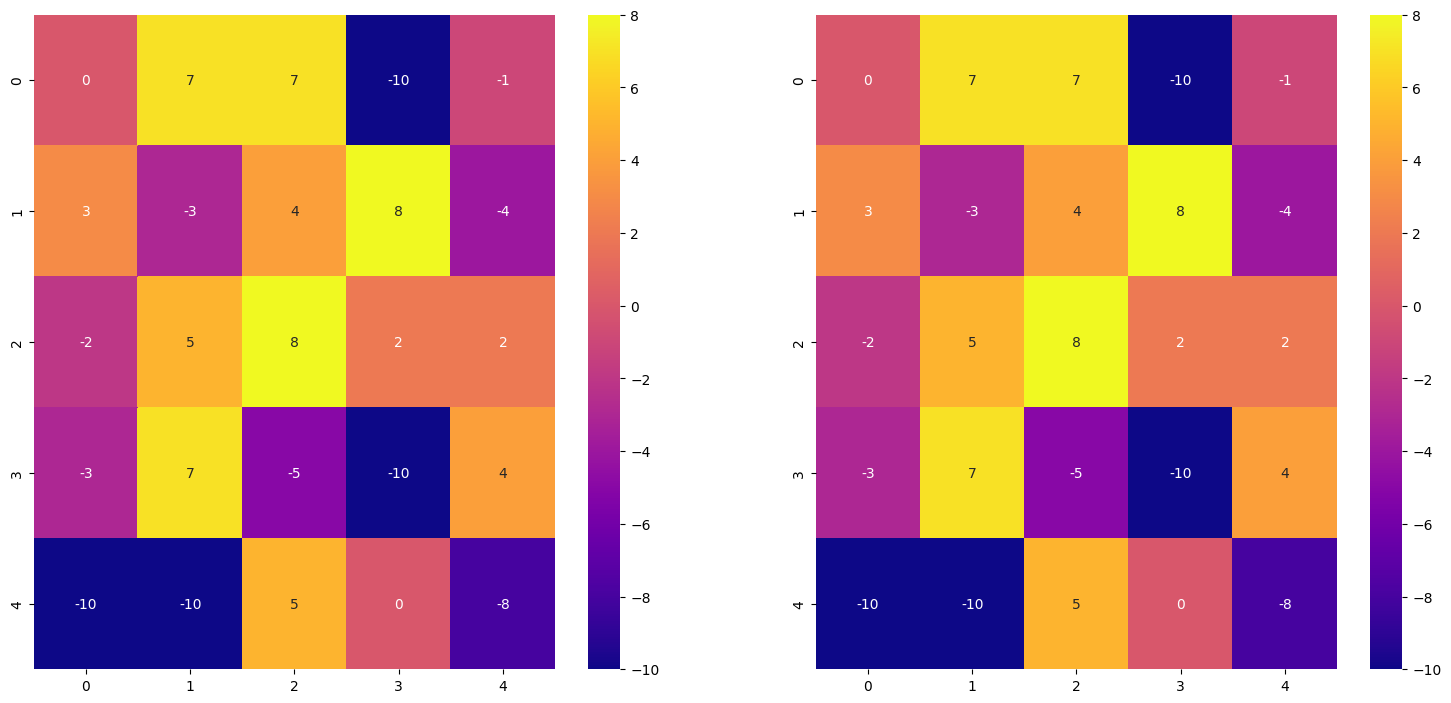

In [70]:
fig, ax =plt.subplots(1,2)

fig.set_size_inches(18.5, 8.5)

sns.heatmap(A, cmap='plasma', ax=ax[0], annot=True)
sns.heatmap(P @ L @ U, cmap='plasma', ax=ax[1], annot=True)

## Exercise 10.1

Time execution of LU

In [24]:
op = []

a = [matrix(100) for i in range(1000)]

for i in range(1000):
    start = time.time()
    scipy.linalg.lu(a[i])
    end = time.time()
    op.append(end - start)
    
print(f'mean time is {np.mean(op) * 1000} milliseconds, sum time is {sum(op)} seconds')

mean time is 4.760680198669434 milliseconds, sum time is 4.760680198669434 seconds


## Exercise 10.2



In [31]:
V = np.random.randint(-10, 10, size=(6,3))
W = np.random.randint(-10, 10, size=(3,8))

In [34]:
A = V @ W
np.linalg.matrix_rank(A)

3

In [47]:
p,l,u = scipy.linalg.lu(A)

<AxesSubplot:title={'center':'p, rank=6'}>

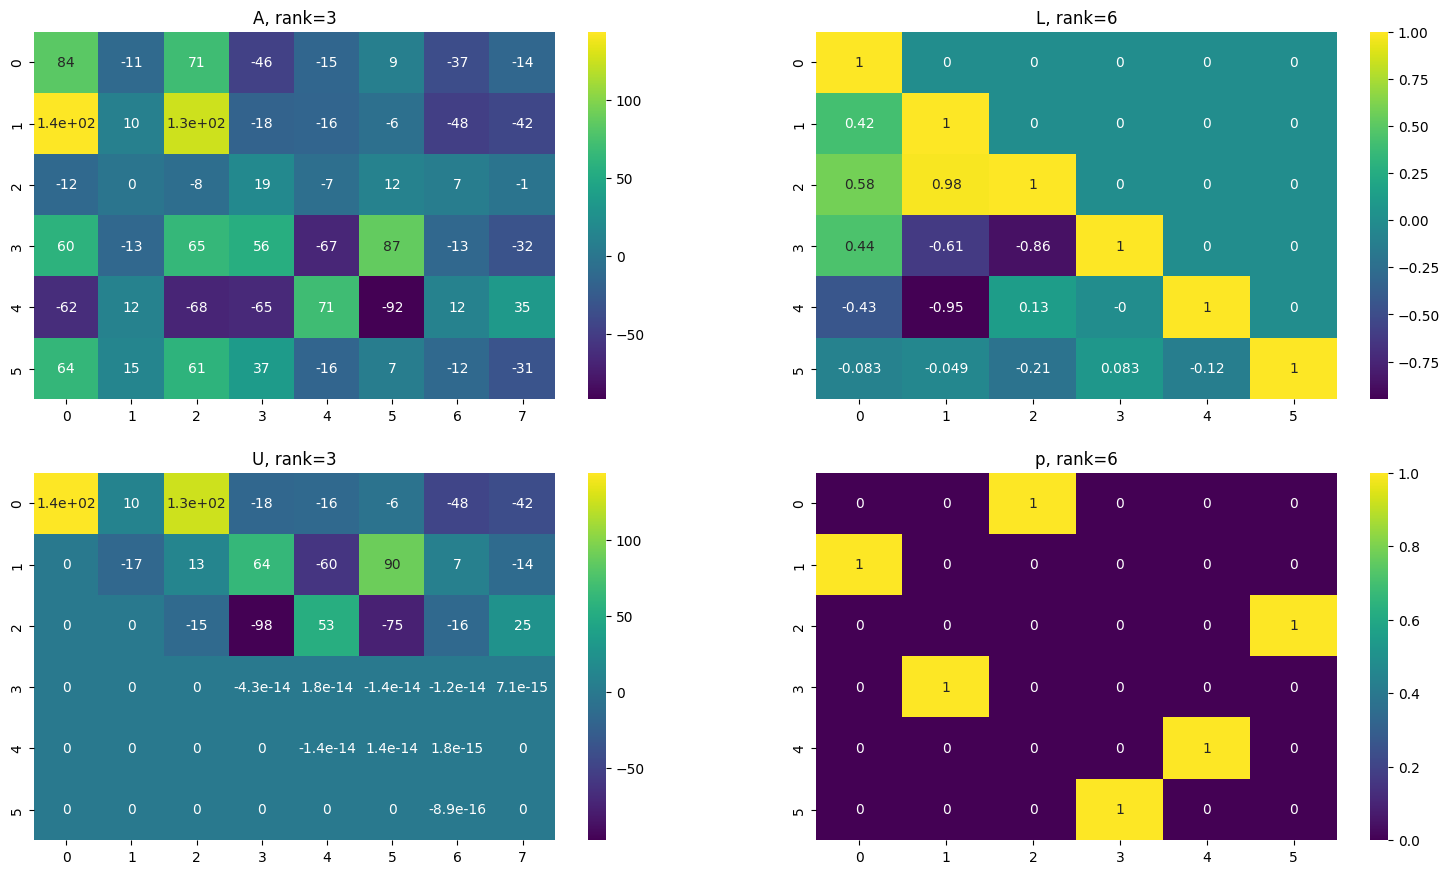

In [49]:
fig, ax = plt.subplots(2,2)

ax[0,0].set_title(label=f'A, rank={np.linalg.matrix_rank(A)}')
ax[0,1].set_title(label=f'L, rank={np.linalg.matrix_rank(l)}')
ax[1,0].set_title(label=f'U, rank={np.linalg.matrix_rank(u)}')
ax[1,1].set_title(label=f'p, rank={np.linalg.matrix_rank(p)}')

fig.set_size_inches(18.5, 10.5)

sns.heatmap(A, cmap='viridis', ax=ax[0,0], annot=True)
sns.heatmap(l, cmap='viridis', ax=ax[0,1], annot=True)
sns.heatmap(u, cmap='viridis', ax=ax[1,0], annot=True)
sns.heatmap(p, cmap='viridis', ax=ax[1,1], annot=True)

## Exercise 10.3

In [67]:
A = imatrix(5)

In [68]:
P,L, U = scipy.linalg.lu(A)

In [69]:
np.linalg.det(A), np.linalg.det(L) * np.linalg.det(U), np.linalg.det(P)

(37793.999999999985, -37793.999999999985, -1.0)

## Exercise 10.4

In [148]:
A = matrix(4)

In [149]:
p,l,u = scipy.linalg.lu(A)

In [150]:
k = A @ (np.linalg.inv(u) @ np.linalg.inv(l) @ p.T)

<AxesSubplot:>

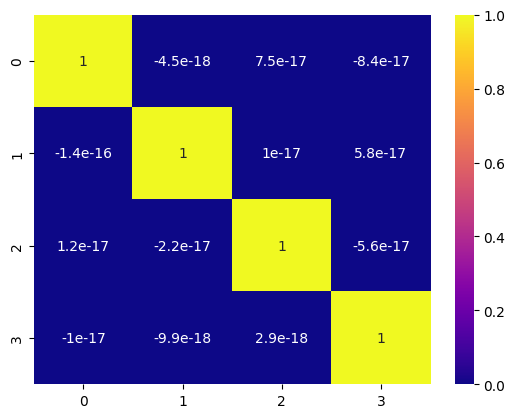

In [151]:
sns.heatmap(k, cmap='plasma', annot=True)

In [143]:
# I don't get what is wrong with the exercise; it is said that one should not
# always get the E; but i do

## Exercise 10.5

Prove that for

$$ A = PLU $$

is true that

$$ A^TA = U^TL^TLU $$

(without P)

The proof is that for P where P is permutation matrix is true that

$$ P^{-1} = P^T $$

(because P is orthogonal)